In [1]:
# Importing the Keras libraries and packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
image_shape=(224,224,3)


2022-02-23 20:20:11.415539: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# convering Images into npy files

import os


def images_to_array(dataset_dir, image_size):
    dataset_array = []
    dataset_labels = []

    class_counter = 0

    classes_names = os.listdir(dataset_dir)
    for current_class_name in classes_names:
        class_dir = os.path.join(dataset_dir, current_class_name)
        images_in_class = os.listdir(class_dir)

        print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

        for image_file in images_in_class:
            if image_file.endswith(".jpg"):
              image_file_dir = os.path.join(class_dir, image_file)

              img = tf.keras.preprocessing.image.load_img(image_file_dir, target_size=(image_size, image_size))
              img_array = tf.keras.preprocessing.image.img_to_array(img)

              img_array = img_array/255.0

              dataset_array.append(img_array)
              dataset_labels.append(class_counter)
        class_counter = class_counter + 1
    dataset_array = np.array(dataset_array)
    dataset_labels = np.array(dataset_labels)
    return dataset_array, dataset_labels

#zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/kaggle-datasets/5857/414958/fruits-360_dataset.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566314394&Signature=rqm4aS%2FIxgWrNSJ84ccMfQGpjJzZ7gZ9WmsKok6quQMyKin14vJyHBMSjqXSHR%2B6isrN2POYfwXqAgibIkeAy%2FcB2OIrxTsBtCmKUQKuzqdGMnXiLUiSKw0XgKUfvYOTC%2F0gdWMv%2B2xMLMjZQ3CYwUHNnPoDRPm9GopyyA6kZO%2B0UpwB59uwhADNiDNdVgD3GPMVleo4hPdOBVHpaWl%2F%2B%2BPDkOmQdlcH6b%2F983JHaktssmnCu8f0LVeQjzZY96d24O4H85x8wdZtmkHZCoFiIgCCMU%2BKMMBAbTL66QiUUB%2FW%2FpULPlpzN9sBBUR2yydB3CUwqLmSjAcwz3wQ%2FpIhzg%3D%3D",
 #                                  fname="fruits-360.zip", extract=True)
base_dir = '/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS'

train_dir = '/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/train_dir'
image_size = 224
train_dataset_array, train_dataset_array_labels = images_to_array(dataset_dir=train_dir, image_size=image_size)
print("Training Data Array Shape :", train_dataset_array.shape)
np.save("train_dataset_array.npy", train_dataset_array)
np.save("train_dataset_array_labels.npy", train_dataset_array_labels)

test_dir = '/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/val_dir'
test_dataset_array, test_dataset_array_labels = images_to_array(dataset_dir=test_dir, image_size=image_size)
print("Test Data Array Shape :", test_dataset_array.shape)
np.save("test_dataset_array.npy", test_dataset_array)
np.save("test_dataset_array_labels.npy", test_dataset_array_labels)

Class index 0 ,  genuine : 7997
Class index 1 ,  forged : 10019
Training Data Array Shape : (18016, 224, 224, 3)
Class index 0 ,  genuine : 1585
Class index 1 ,  forged : 1999
Test Data Array Shape : (3584, 224, 224, 3)


In [3]:
classes = ["genuine","forged"]

In [4]:
X_train= np.load('train_dataset_array.npy')
y_train= np.load('train_dataset_array_labels.npy')
X_test=  np.load('test_dataset_array.npy')
y_test=  np.load('test_dataset_array_labels.npy')

In [5]:
X_train =X_train / 255
X_test = X_test / 255

In [6]:
from tensorflow.keras.models import Sequential
model=Sequential()

2022-02-23 20:21:47.737550: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-23 20:21:47.739621: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-23 20:21:47.802613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-23 20:21:47.802692: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-23 20:21:47.806520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-23 20:21:47.806656: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0

In [7]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
hidden_layer=model.add(Dense(128, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(64, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(1, activation='sigmoid', name='output_layer')) 
print("All layers top of pretrained layers are developed")

All layers top of pretrained layers are developed


https://www.kaggle.com/blurredmachine/alexnet-architecture-a-complete-guide

In [31]:
# Input parameter
#train_data_dir ='/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir'
train_data_dir='/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/train_dir/'
val_data_dir ='/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/val_dir/'
model_weights_file = '/home/poornima/Data/GDPS/model_vgg16_weights.hdf5'
nb_epochs = 100
print("Input parameters are assigned")

Input parameters are assigned


In [8]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [32]:
# image data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 224, 224
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False,class_mode='binary')

Found 18016 images belonging to 2 classes.
Found 3584 images belonging to 2 classes.


In [ ]:
model.fit(X_train, y_train, epochs=50)
print("training completed")

In [9]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
filepath = "/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/saved-SGD-model-custom-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

In [10]:
#callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test,y_test), callbacks=[checkpoint,early])

print('Training Completed!')

2022-02-23 20:22:28.580094: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 10847649792 exceeds 10% of free system memory.
2022-02-23 20:22:35.336227: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-23 20:22:35.358059: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/100


2022-02-23 20:22:36.075887: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-23 20:22:36.463282: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-23 20:22:37.833785: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-23 20:22:38.201336: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1126/1126 [==============================] - 227s 99ms/step - loss: 0.6890 - accuracy: 0.5504 - val_loss: 0.6865 - val_accuracy: 0.5578

Epoch 00001: val_accuracy improved from -inf to 0.55776, saving model to /home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/saved-SGD-model-custom-01-0.56.h5
Epoch 2/100
1126/1126 [==============================] - 109s 97ms/step - loss: 0.6878 - accuracy: 0.5523 - val_loss: 0.6865 - val_accuracy: 0.5578

Epoch 00002: val_accuracy did not improve from 0.55776
Epoch 3/100
1126/1126 [==============================] - 110s 97ms/step - loss: 0.6876 - accuracy: 0.5537 - val_loss: 0.6865 - val_accuracy: 0.5578

Epoch 00003: val_accuracy did not improve from 0.55776
Epoch 4/100
1126/1126 [==============================] - 109s 97ms/step - loss: 0.6873 - accuracy: 0.5546 - val_loss: 0.6865 - val_accuracy: 0.5578

Epoch 00004: val_accuracy did not improve from 0.55776
Epoch 5/100
1126/1126 [==============================] - 109s 97ms/step - los

1126/1126 [==============================] - 108s 96ms/step - loss: 0.6855 - accuracy: 0.5620 - val_loss: 0.6865 - val_accuracy: 0.5578

Epoch 00040: val_accuracy did not improve from 0.55776
Epoch 41/100
1126/1126 [==============================] - 109s 97ms/step - loss: 0.6869 - accuracy: 0.5565 - val_loss: 0.6865 - val_accuracy: 0.5578

Epoch 00041: val_accuracy did not improve from 0.55776
Epoch 00041: early stopping
Training Completed!


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


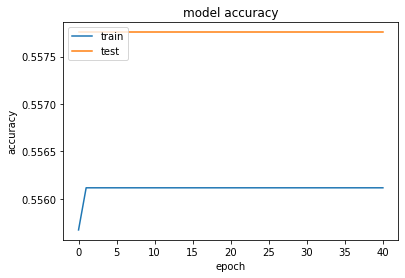

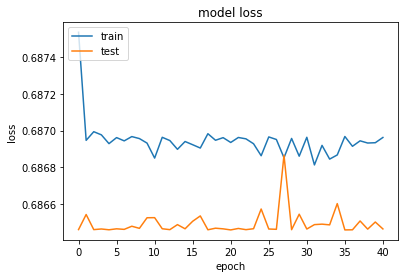

In [11]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
 # save model and architecture to single file
model.save('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/novel_model_verification_sgd__Custom.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [13]:
# save weights to single file
model.save_weights('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/novel_model_verification_weights_custom.h5')
print("Weights saved in local  Drive")

Weights saved in local  Drive


In [14]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/novel_model_verification_sgd__Custom.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 

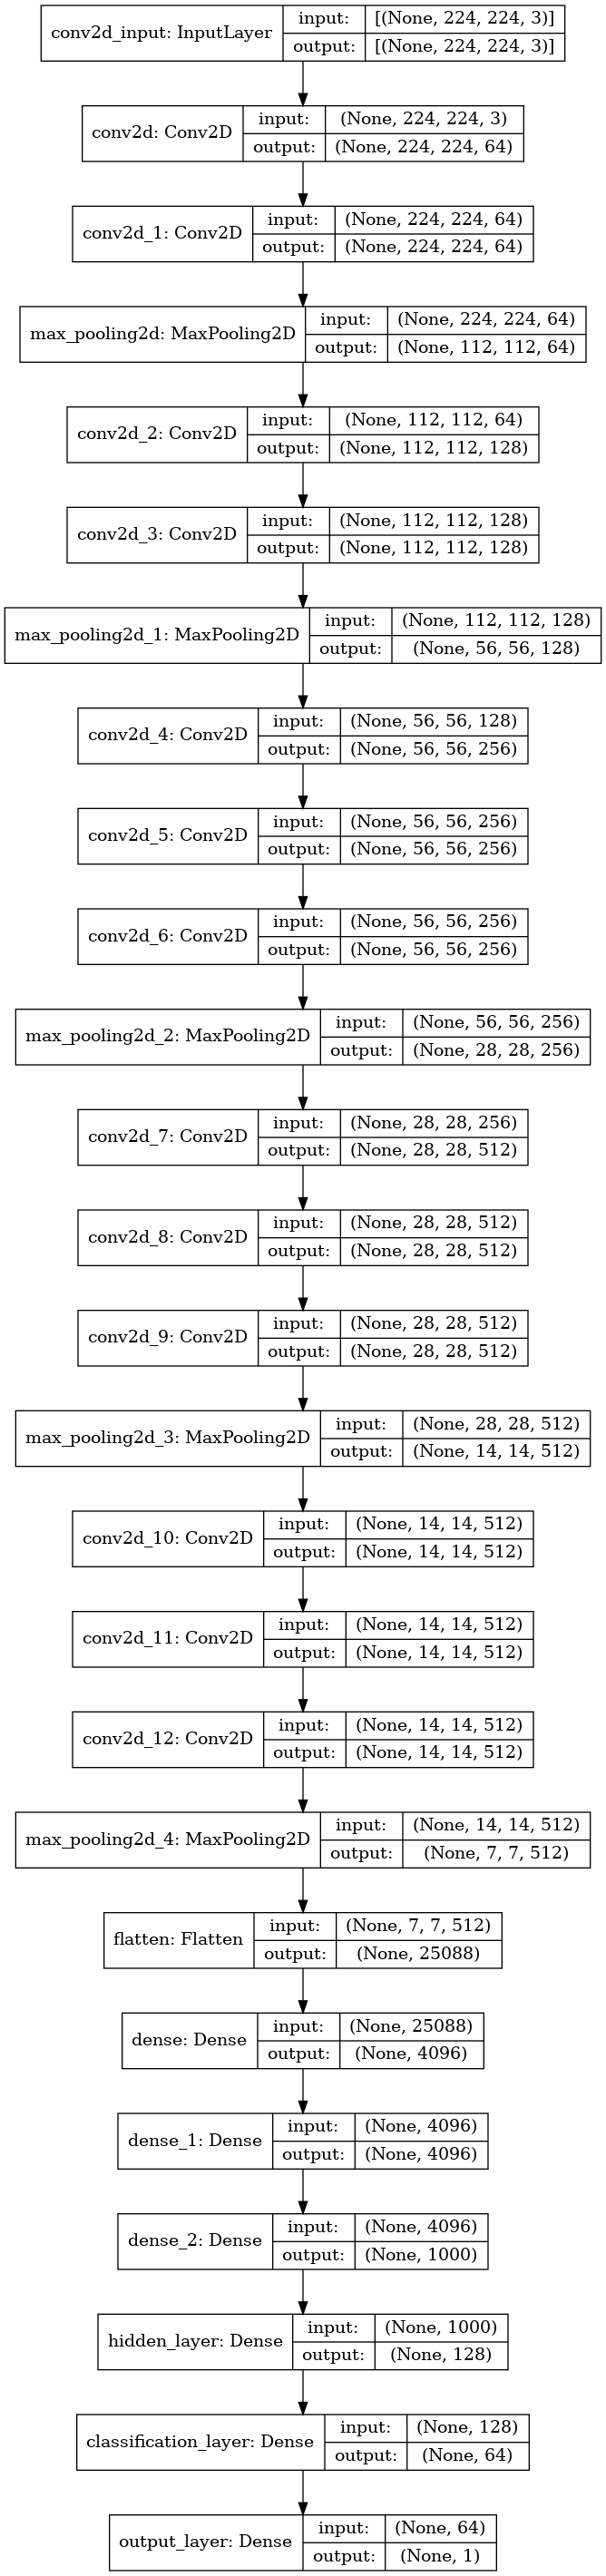

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [17]:
y_train_pred=model.predict(X_train)

2022-02-24 08:57:59.657870: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 10847649792 exceeds 10% of free system memory.


In [21]:
y_train_pred = (y_train_pred > 0.5)

In [19]:
y_test_pred=model.predict(X_test)

In [22]:
y_test_pred = (y_test_pred > 0.5)

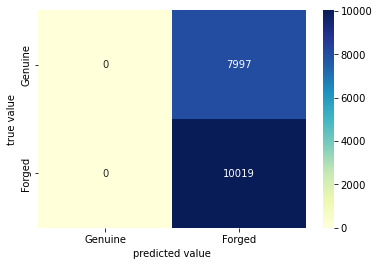

In [23]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_train,y_train_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'] );
plt.xlabel('predicted value')
plt.ylabel('true value');

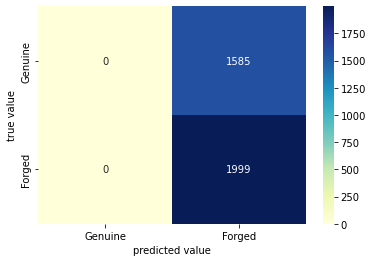

In [24]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test,y_test_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'] );
plt.xlabel('predicted value')
plt.ylabel('true value');

In [33]:
import pandas as pd
validation_generator.reset
ytesthat = model.predict(validation_generator)
print(ytesthat)
df = pd.DataFrame({
    'filename':validation_generator.filenames,
    'predict':ytesthat[:,0],
    'y':validation_generator.classes
})

[[0.5562611 ]
 [0.5562437 ]
 [0.55627304]
 ...
 [0.5562703 ]
 [0.55625904]
 [0.5562815 ]]


In [34]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df

,filename,predict,y,y_pred
0,forged/cf-002-06.jpg,0.55626,0,1
1,forged/cf-002-07.jpg,0.55624,0,1
2,forged/cf-002-08.jpg,0.55627,0,1
3,forged/cf-002-09.jpg,0.55623,0,1
4,forged/cf-002-10.jpg,0.55627,0,1
...,...,...,...,...
3579,genuine/c-4000-20.jpg,0.55628,1,1
3580,genuine/c-4000-21.jpg,0.55629,1,1
3581,genuine/c-4000-22.jpg,0.55627,1,1
3582,genuine/c-4000-23.jpg,0.55626,1,1


In [35]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified  Validation images : %d'%misclassified['y'].count())

Total misclassified  Validation images : 1999


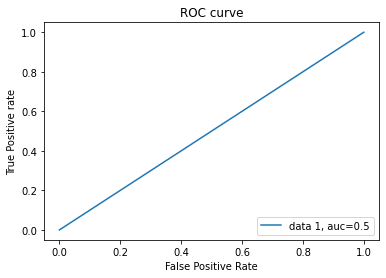

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

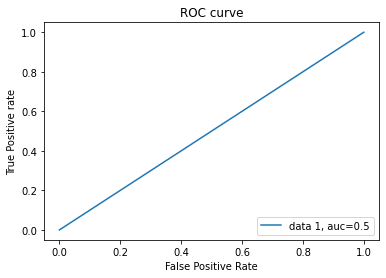

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_train_pred)
auc = roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [42]:
# Extracting Features from classification Layer
from tensorflow.keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [43]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [45]:
# Saving intermediate model
intermediate_layer_model.save('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/intermediate_model_novel_sgd_Custom.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0   

In [46]:
# Loading Intermediate Model
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/intermediate_model_novel_sgd_Custom.h5')
print("Intermediate model is loaded")

Intermediate model is loaded


In [47]:
# Training Label feature identification(y_train)

batch_size=16
sample_count=18016
features = np.zeros(shape=(18016, 64))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(18016))
i = 0
for inputs_batch, labels_batch in train_generator:
   features_batch = model.predict(inputs_batch)
   features[i * batch_size: (i + 1) * batch_size] = features_batch
   labels[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels.shape)

(18016,)


In [48]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=np.expand_dims(labels, axis=1)
print(labels_train.shape)
print(labels_train)
print(features_train)

(18016, 64)
(18016, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[[0.00525107 0.         0.         ... 0.         0.         0.        ]
 [0.0052487  0.         0.         ... 0.         0.         0.        ]
 [0.00522509 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00528797 0.         0.         ... 0.         0.         0.        ]
 [0.00532289 0.         0.         ... 0.         0.         0.        ]
 [0.00520009 0.         0.         ... 0.         0.         0.        ]]


In [49]:
# identification of test labels
import numpy as np
batch_size=16
sample_count=3584
features_test = np.zeros(shape=(3584, 64))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(3584))
i = 0
for inputs_batch, labels_batch in validation_generator:
   features_batch = model.predict(inputs_batch)
   features_test[i * batch_size: (i + 1) * batch_size] = features_batch
   labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

(3584,)
(3584, 64)
[0. 0. 0. ... 1. 1. 1.]


In [50]:
# #identification of testing Labels
print(features_test.shape)
labels_test=np.expand_dims(labels_test, axis=1)
print(labels_test.shape)
print(features_test)

(3584, 64)
(3584, 1)
[[0.0054348  0.         0.         ... 0.         0.         0.        ]
 [0.00528887 0.         0.         ... 0.         0.         0.        ]
 [0.00532923 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00532757 0.         0.         ... 0.         0.         0.        ]
 [0.00520887 0.         0.         ... 0.         0.         0.        ]
 [0.00522828 0.         0.         ... 0.         0.         0.        ]]


In [51]:
# SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1999    0]
 [1585    0]]
Accuracy: 55.776
Precision: 0.000
Recall: 0.000
F-Measure: 0.000


/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1590  409]
 [ 991  594]]
Accuracy: 60.938
Precision: 59.222
Recall: 37.476
F-Measure: 45.904


In [53]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1407  592]
 [ 989  596]]
Accuracy: 55.887
Precision: 50.168
Recall: 37.603
F-Measure: 42.986


In [54]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1407  592]
 [ 989  596]]
Accuracy: 55.887
Precision: 50.168
Recall: 37.603
F-Measure: 42.986


In [55]:
# Naive Bayes
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1196  803]
 [ 732  853]]
Accuracy: 57.171
Precision: 51.510
Recall: 53.817
F-Measure: 52.638


In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1198  801]
 [ 704  881]]
Accuracy: 58.008
Precision: 52.378
Recall: 55.584
F-Measure: 53.933


In [57]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[1556  443]
 [1023  562]]
Accuracy: 59.096
Precision: 55.920
Recall: 35.457
F-Measure: 43.398


In [58]:
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/model_vgg16_GDPS.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)

OSError: SavedModel file does not exist at: /home/poornima/Data/Dataset GDPS-20220127T080751Z-001/Dataset GDPS/model_vgg16_GDPS.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know category of Image",  )
output = widgets.Output()

model = load_model('/content/drive/My Drive/Colab Notebooks/Signature Verification vgg16 model GDPS/model_vgg16_GDPS.h5')
img_path = '/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir/forged/cf-001-01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
if(block4_pool_features> 0.5):
  a= 'Genuine'
elif(block4_pool_features< 0.5):
  a='forged'
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Image is  "  + a)

button.on_click(on_button_clicked)
display(button, output)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Button clicked.")

button.on_click(on_button_clicked)
display(button, output)